# Model Building

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bb = pd.read_csv('clean_pitching.csv')

In [3]:
bb.drop(['Unnamed: 0'], axis=1, inplace=True)
bb

,team,win_pct,era,games,innings,hits,homeruns,walks,strikeouts,hbp,batters_faced,fip,whip,kw_ratio,year,on_base_pct
0,Atlanta Braves,0.469,4.33,162,1430.2,1451,185,478,960,30,6179,4.04,1.348,2.01,0,0.317
1,Baltimore Orioles,0.667,3.15,162,1478.2,1317,139,469,941,23,6099,3.59,1.208,2.01,0,0.297
2,Boston Red Sox,0.537,3.87,162,1446.1,1391,156,594,1003,44,6258,3.98,1.372,1.69,0,0.324
3,California Angels,0.531,3.48,162,1462.1,1280,154,559,922,43,6100,3.98,1.258,1.65,0,0.309
4,Chicago Cubs,0.519,3.76,162,1435.0,1402,143,475,1000,25,6086,3.59,1.308,2.11,0,0.313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,St. Louis Cardinals,0.556,3.98,162,1417.0,1234,152,608,1225,85,6046,4.30,1.300,2.01,51,0.319
1440,Tampa Bay Rays,0.617,3.67,162,1455.2,1264,184,436,1478,55,5998,3.79,1.168,3.39,51,0.293
1441,Texas Rangers,0.370,4.79,162,1424.1,1402,232,513,1239,61,6103,4.76,1.344,2.42,51,0.324
1442,Toronto Blue Jays,0.562,3.91,162,1405.1,1257,209,473,1468,75,5916,4.18,1.231,3.10,51,0.305


Text(0.5, 1.2, 'Feature Correlation with Target')

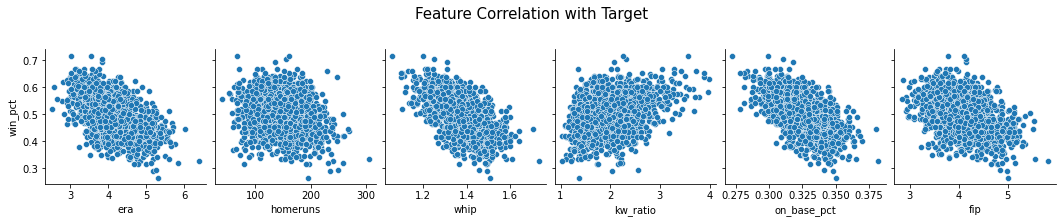

In [4]:
target_pairs = sns.pairplot(data=bb, x_vars=['era', 'homeruns', 'whip', 'kw_ratio', 'on_base_pct', 'fip'], y_vars=['win_pct'])
target_pairs.fig.suptitle('Feature Correlation with Target', y=1.2, fontsize=15)


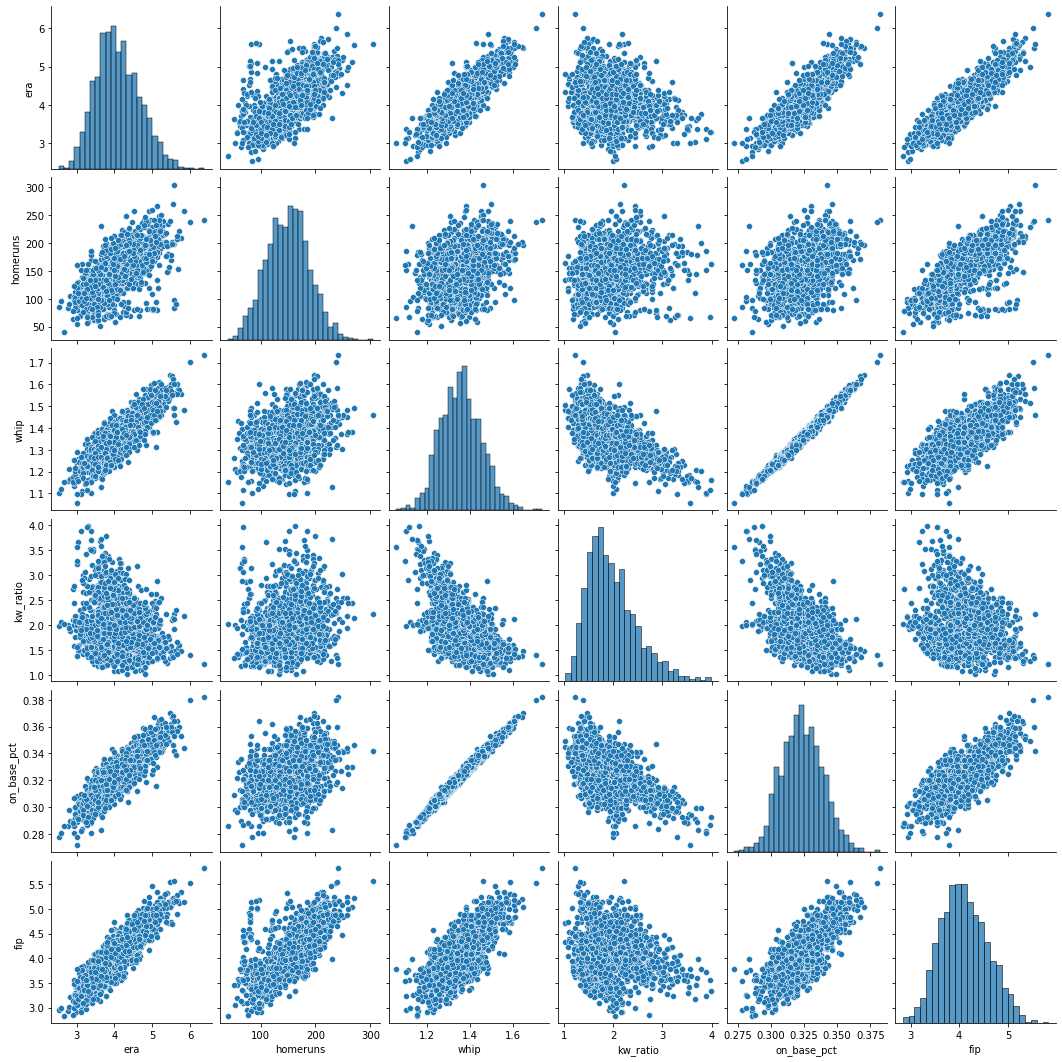

In [5]:
feature_pairs = sns.pairplot(data=bb, x_vars=['era', 'homeruns', 'whip', 'kw_ratio', 'on_base_pct', 'fip'], y_vars=['era', 'homeruns', 'whip', 'kw_ratio', 'on_base_pct', 'fip'])

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

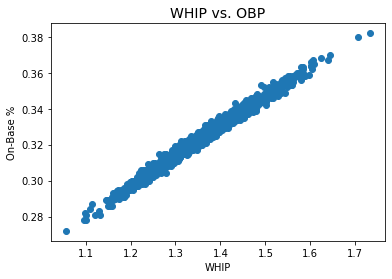

In [6]:
plt.scatter(x=bb['whip'], y=bb['on_base_pct'])
plt.title('WHIP vs. OBP', fontsize=14)
plt.xlabel('WHIP')
plt.ylabel('On-Base %')
plt.grid

Text(0.5, 1.2, 'Feature Correlation with Target')

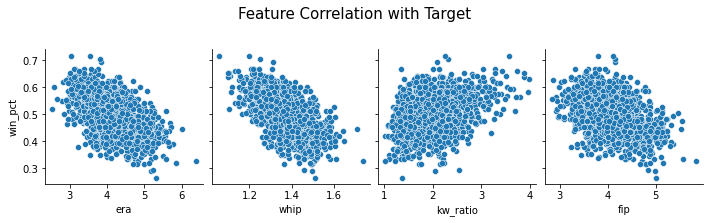

In [7]:
final_target_pairs = sns.pairplot(data=bb, x_vars=['era', 'whip', 'kw_ratio', 'fip'], y_vars=['win_pct'])
final_target_pairs.fig.suptitle('Feature Correlation with Target', y=1.2, fontsize=15)

In [8]:
y = bb['win_pct']
X = bb[['era', 'whip', 'kw_ratio', 'fip']]
X = sm.add_constant(X)

basic_model = sm.OLS(y, X)
b_fit = basic_model.fit()
print(b_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     240.4
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          3.72e-158
Time:                        07:57:10   Log-Likelihood:                 2134.8
No. Observations:                1444   AIC:                            -4260.
Df Residuals:                    1439   BIC:                            -4233.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7528      0.052     14.387      0.0

## Assumption Testing

<AxesSubplot:xlabel='kw_ratio', ylabel='win_pct'>

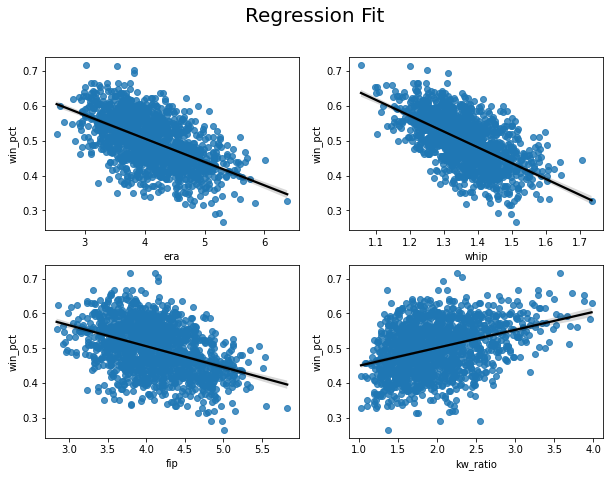

In [9]:
plt.figure(figsize=(10,7))
plt.suptitle('Regression Fit', fontsize=20)

plt.subplot(2,2,1)
sns.regplot(x='era', y='win_pct', data=bb,
            line_kws={'color': 'black'})

plt.subplot(2,2,2)
sns.regplot(x='whip', y='win_pct', data=bb,
           line_kws={'color': 'black'})

plt.subplot(2,2,3)
sns.regplot(x='fip', y='win_pct', data=bb,
           line_kws={'color': 'black'})

plt.subplot(2,2,4)
sns.regplot(x='kw_ratio', y='win_pct', data=bb,
           line_kws={'color': 'black'})

In [10]:
bb_copy = bb

Text(0.5, 1.0, 'Residual Plot')

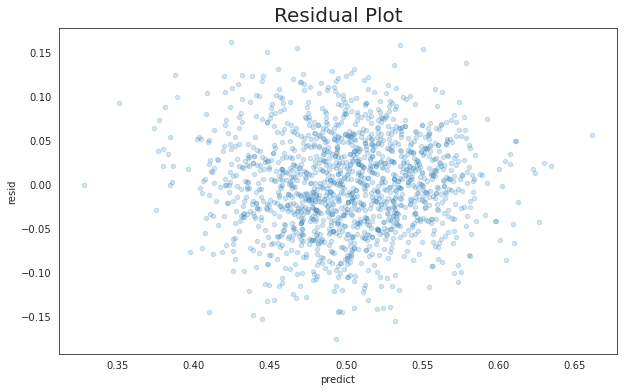

In [11]:
bb_copy['predict'] = b_fit.predict(X)
bb_copy['resid'] = bb_copy['win_pct'] - bb_copy['predict']

with sns.axes_style('white'):
    plot=bb_copy.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))
plt.title('Residual Plot', fontsize=20)

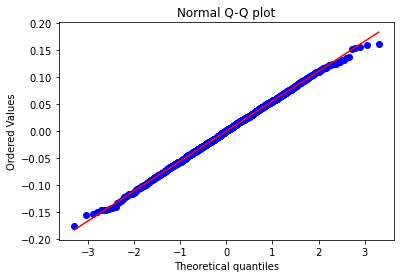

In [12]:
from scipy import stats

stats.probplot(bb_copy['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

## Model Evaluation

* Adjusted R^2 = 0.399
* RMSE = 0.0552 Win %
* MAE = 0.0443 Win %

In [13]:
resid = b_fit.predict(X) - y

In [14]:
rmse = np.sqrt(sum(resid**2)/len(resid))
print(rmse)

0.055168570756367996


In [15]:
mae = sum(abs(b_fit.predict(X) - y))/len(y)
print(mae)

0.04430301730651214


## Cross Validation

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [17]:
from sklearn.model_selection import KFold

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=121)

X, y = np.array(X), np.array(y)

In [18]:
X.shape

(1155, 5)

In [19]:
kf = KFold(n_splits=5, shuffle=True, random_state = 102)

cv_lm_r2s, cv_lm_rmse = [], []

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    residuals = lm.predict(X_val) - y_val
    cv_lm_rmse.append(np.sqrt(sum(residuals**2)/len(residuals)))
    

In [20]:
print('Simple regression scores: ', cv_lm_r2s)
print('Simple regression RMSE values:', cv_lm_rmse, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Simple mean cv rmse: {np.mean(cv_lm_rmse):.3f} +- {np.std(cv_lm_rmse):.3f}')

Simple regression scores:  [0.4017500150577835, 0.3814945064014301, 0.35899519831784377, 0.40771541246462395, 0.45178749549946606]
Simple regression RMSE values: [0.05519276815112904, 0.0581076448981426, 0.05807002146474769, 0.051901477864243616, 0.05177030527103506] 

Simple mean cv r^2: 0.400 +- 0.031
Simple mean cv rmse: 0.055 +- 0.003


In [21]:
lm.fit(X, y)
print(lm.score(X_test, y_test))

residuals = lm.predict(X_test) - y_test
print(np.sqrt(sum(residuals**2)/len(residuals)))

0.37798198052974397
0.0566729120324541


/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [25]:
lm.coef_

array([ 0.        , -0.08557666, -0.14080514,  0.0284617 ,  0.05759166])

In [26]:
lm.intercept_

0.7493664372162058

In [22]:
final_model = sm.OLS(y, X)
final_fit = final_model.fit()
print(final_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          1.71e-128
Time:                        07:57:11   Log-Likelihood:                 1715.5
No. Observations:                1155   AIC:                            -3421.
Df Residuals:                    1150   BIC:                            -3396.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7494      0.058     12.847      0.0